# Playing with ImageNette

In [1]:
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from fastai import datasets

torch.backends.cudnn.benchmark = True
fastprogress.MAX_COLS = 80

In [2]:
import fastai
fastai.__version__

'1.0.47.post1'

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

## Get Data

In [6]:
path = untar_data(URLs.IMAGENETTE_160)
tfms = get_transforms(do_flip=False)

In [8]:
size = 128 # from https://github.com/fastai/fastai/blob/master/examples/train_imagenette.py#L29
bs = 128
n_gpus = 1
workers = min(8, num_cpus()//n_gpus)

In [9]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imagenette-160/models'),
 PosixPath('/home/jupyter/.fastai/data/imagenette-160/val'),
 PosixPath('/home/jupyter/.fastai/data/imagenette-160/train')]

## Data Transformations

In [10]:
data = (ImageList.from_folder(path).split_by_folder(valid='val')
            .label_from_folder().transform(([flip_lr(p=0.5)], []), size=size)
            .databunch(bs=bs, num_workers=workers)
#             .presize(size, scale=(0.35,1))
.normalize(imagenet_stats))

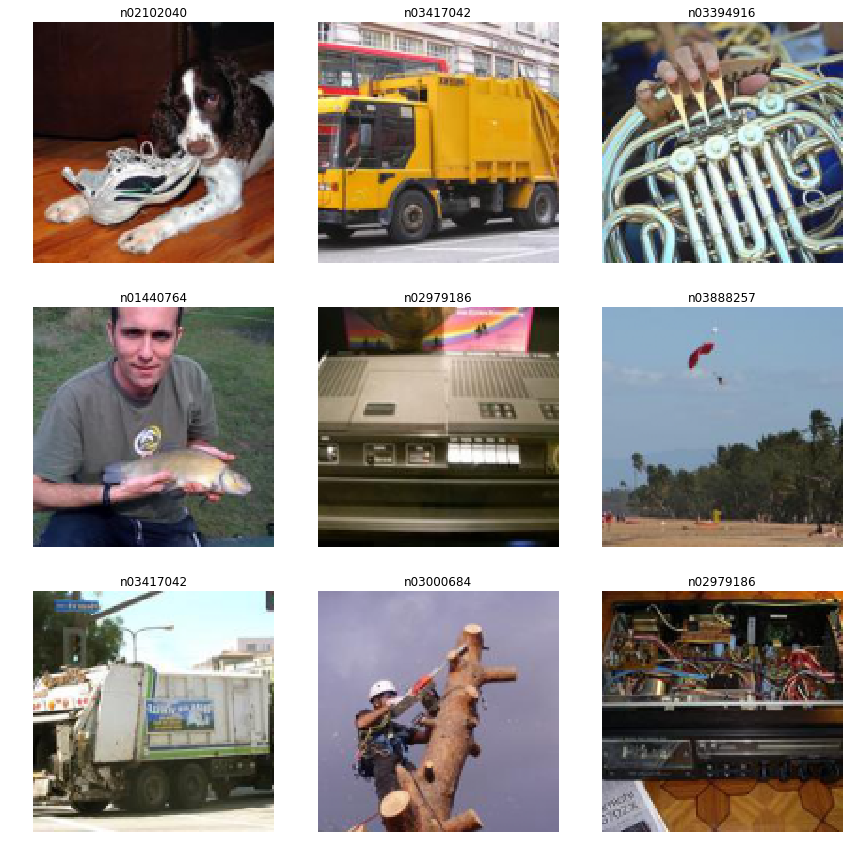

In [11]:
data.show_batch(rows=3)

In [12]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.323182,0.194755,0.938000,00:12
1,0.280926,0.286313,0.920000,00:11
2,0.216705,0.209853,0.936000,00:11
3,0.141619,0.117519,0.960000,00:11
4,0.092390,0.115075,0.966000,00:11


In [13]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.torch/models/resnet34-333f7ec4.pth
87306240it [00:46, 1872567.39it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.290563,0.159764,0.958000,00:16
1,0.265254,0.287369,0.922000,00:16
2,0.215589,0.175566,0.950000,00:16
3,0.128055,0.119050,0.960000,00:16
4,0.082555,0.099506,0.974000,00:16


In [14]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
102502400it [00:05, 19818230.40it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.201598,0.201819,0.936000,00:38
1,0.277761,0.319380,0.908000,00:34
2,0.198246,0.196759,0.944000,00:34
3,0.122084,0.135930,0.972000,00:34
4,0.059642,0.142229,0.970000,00:34


In [16]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/jupyter/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:21, 8250947.35it/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.218075,1.011636,0.736000,00:53
1,0.299678,0.342111,0.906000,00:53
2,0.228239,0.201090,0.944000,00:53
3,0.132106,0.181260,0.952000,00:53
4,0.063644,0.154105,0.958000,00:53
